# Proyecto 13 - Gimnasios Model Fitness

# Introducción 

El objetivo de este proyecto fue desarrollar una estrategia para la interacción y retención de clientes de la cadena de gimnasios Model Fitness, utilizando técnicas de análisis de datos. Sabemos que uno de los principales desafíos que enfrentan los gimnasios es la pérdida de clientes, que a menudo ocurre de manera sutil y no siempre es fácilmente identificable.
Para abordar este problema, se digitalizaron los perfiles de varios clientes y se analizó un conjunto de datos que incluye características demográficas, de comportamiento y de membresía.

El análisis se centró en identificar los patrones, comprender los factores que influyen en la retención de clientes y segmentar a los usuarios en clústeres basados en características compartidas.

# Paso 1

    se importaron las librerias y realizamos el análasis exploratorio de los datos 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans

In [3]:
gym_df= pd.read_csv('gym_churn_us.csv')

In [4]:
print(gym_df.head())

   gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0  

In [5]:
gym_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [6]:
print(gym_df.describe())

            gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.00

Para este dataframe tenemos que las 14 columnas correspondientes del gym se encuentran sin valores vacios y el tipo de datos va de acuerdo a sus natularezas lo que los datos nos una fuerte confianza para ser analizados, para sus valores medios empezando con el genero.
* Tenemos 0.51 eso quiere decir que en promedio tenemos que los clientes son equitativos con los generos con ligera tendencia a los hombres.
* Para la location tenemos que el 84% de los usuarios viven en el vecindario.
* Para los partners que son aquellos clientes de empresas asociadas tenemos un 48%, y los que usan una promo de amigos es el 31%.
* Para los datos del telefono hay un 90% de los clientes que si lo tiene registrado. 
* Para el periodo de contrato el promedio es 4.6 pero eso no indica mucho ya que los planes son de 1, 3, 6 y 12 meses, asi que viend0 los percentiles vemos que el 50% son de 1 mes y menos del 25% son de 3 meses y el otro 25% esta dividido entre planes de 6 y 12
* Para las participaciones grupales tenemos que en promedio el 41% realiza esta actividad
* Para las edades vemos que estan en un rango de 18 a 41 años y que promedio es de 29 y el 75% de los usuarios son mayores a 27 años donde el 50% se encuentra en un rango ed 27 y 31 años
* Para los gastos adicionales vemos que el monto maximo fue de 552.59 y en promedio los usuarios consumen 146.94 USD  
* Para los meses que faltan para terminar el contrato se observa que en promedio les queda 4.32 meses pero el 50% solo les queda un mes y al 25% les queda más de 6 meses
* Para el lifetime en promedio los usuarios han sido clientes por 3.72 meses
* Para el promedio de la frecuencia de asistencia por semana de los clientes tenemos dos, una que ha sido durante todo su lifetime y otra para el meses en curso asi que para la primera en promedio asisten 1.87 veces a la semana y del mes actual 1.76 
* Para las cancelaciones observamos que en promedio solo el 26.5% cancela 

# Paso 1.1
    Trazamos histogramas y distribuciones de características y mostramos una matriz de correlación enfancandonos en comparar características entre clientes.

In [7]:
churn_mean = gym_df.groupby('Churn').mean() 
print(churn_mean)

         gender  Near_Location   Partner  Promo_friends     Phone  \
Churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       Contract_period  Group_visits        Age  Avg_additional_charges_total  \
Churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
Churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       Avg_class_frequency_current_month  
Churn                                     
0                               2.0

Los puntos a resaltar es que ya podemos darnos una idea de los usuarios que se encuntran en promedio con carectariscas para cancelar, lo primero es el contrato de tiempo donde los que cancelaron en promedio duran 1.72 meses un gran diferencia a los que no con 5.74 meses y esto podemos verlo con el promedio de lifetime que los que cancelan tienen  0.99 de meses y que en general tienen 26% de asistencia a las actividades grupales mientras que los usuarios que no cancela tiene 46% en promedio y en promedio es gente más joven por 3 años.

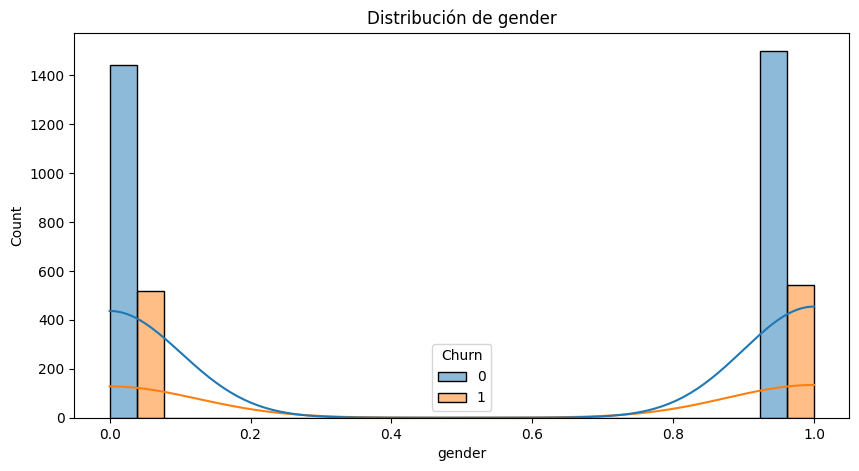

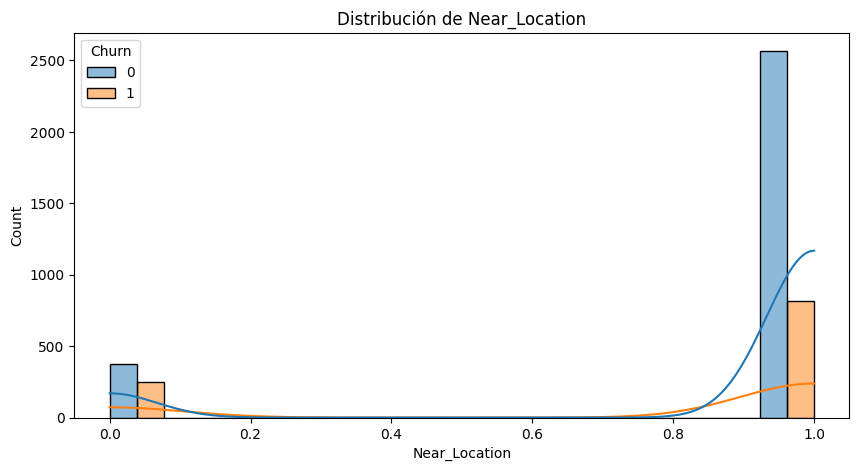

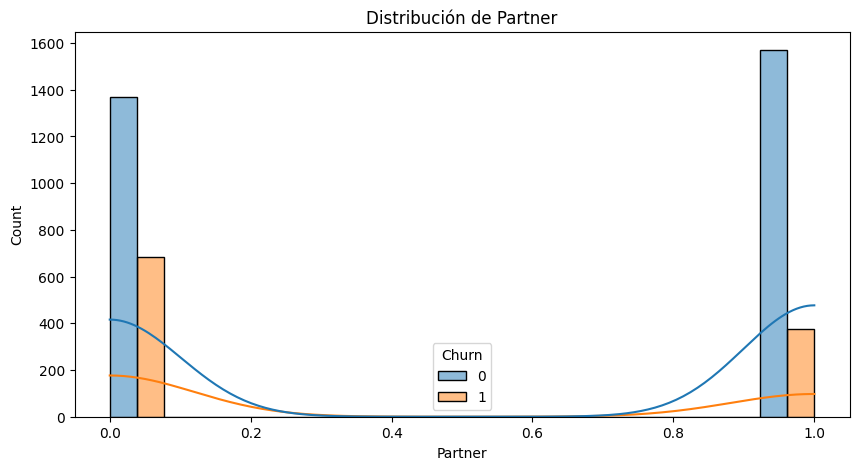

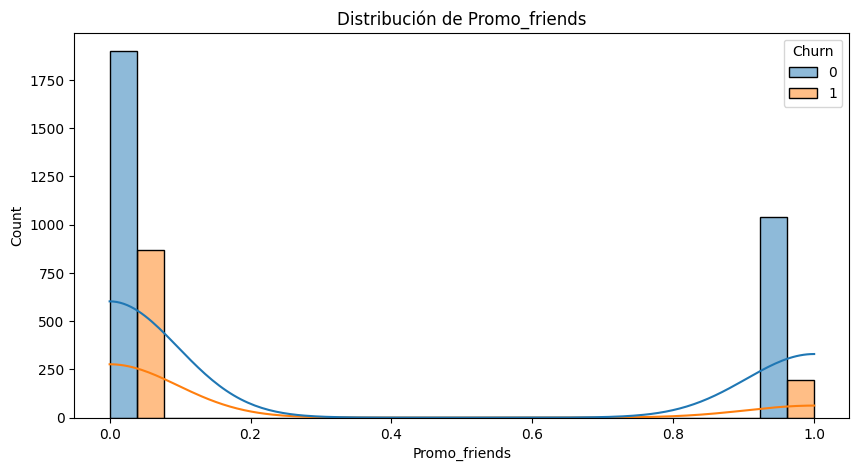

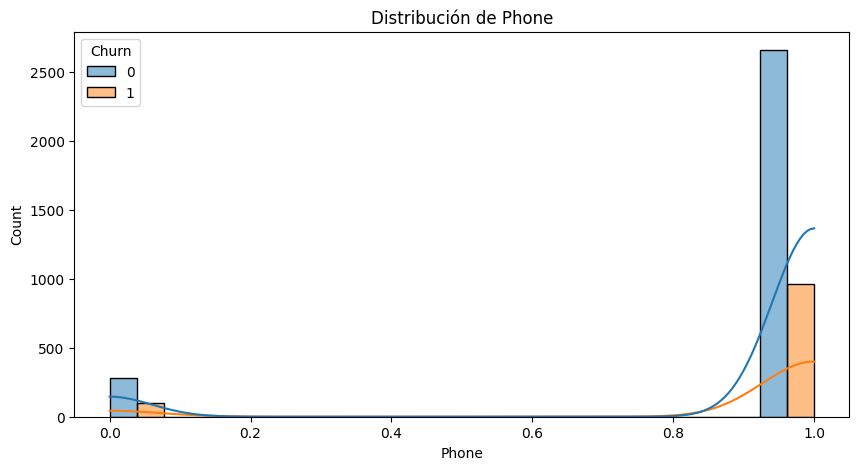

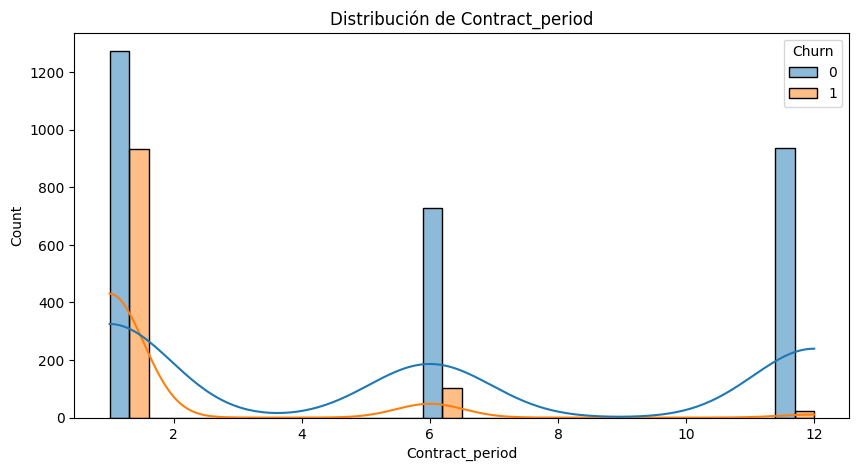

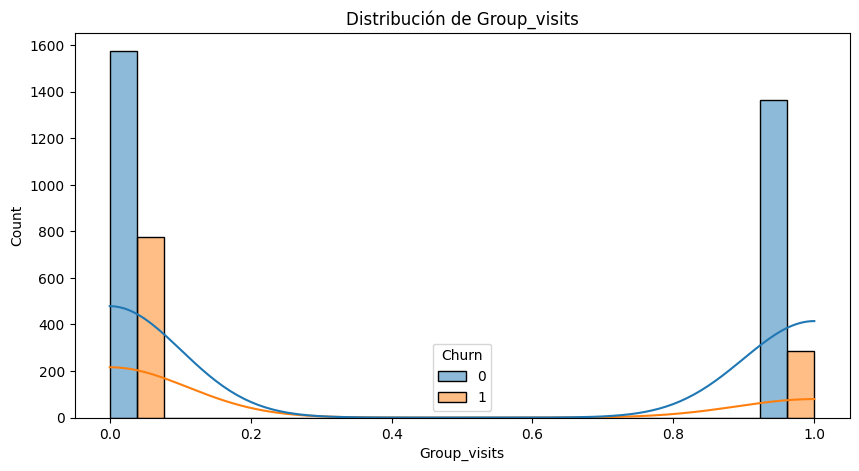

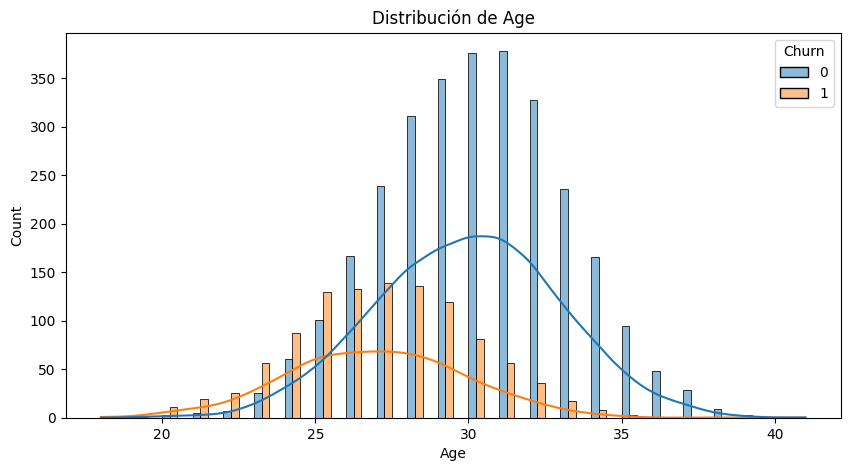

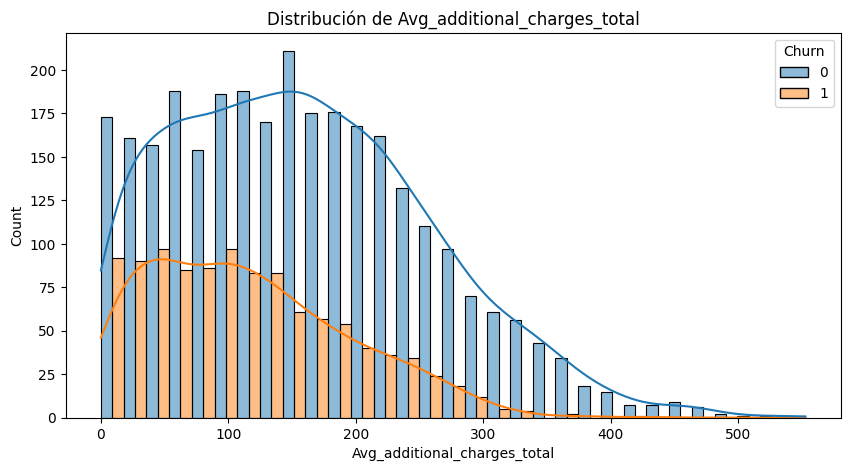

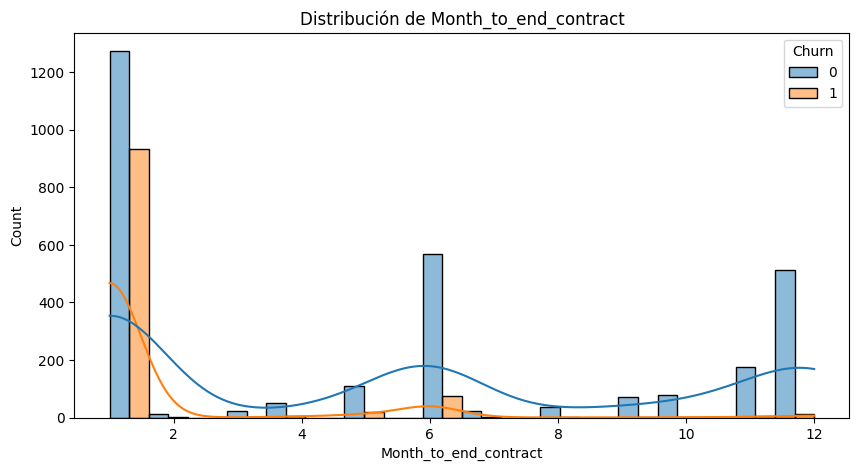

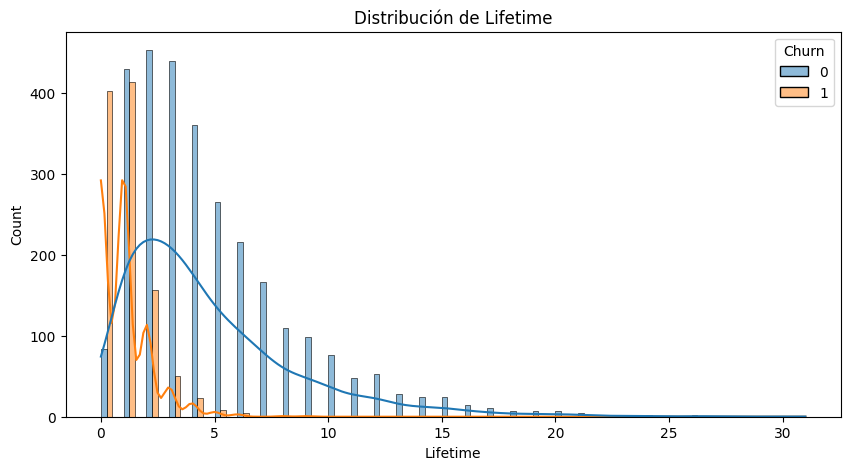

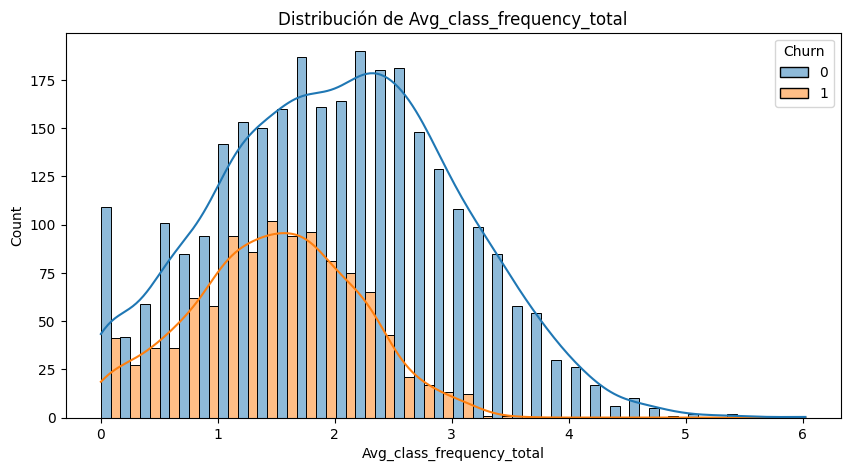

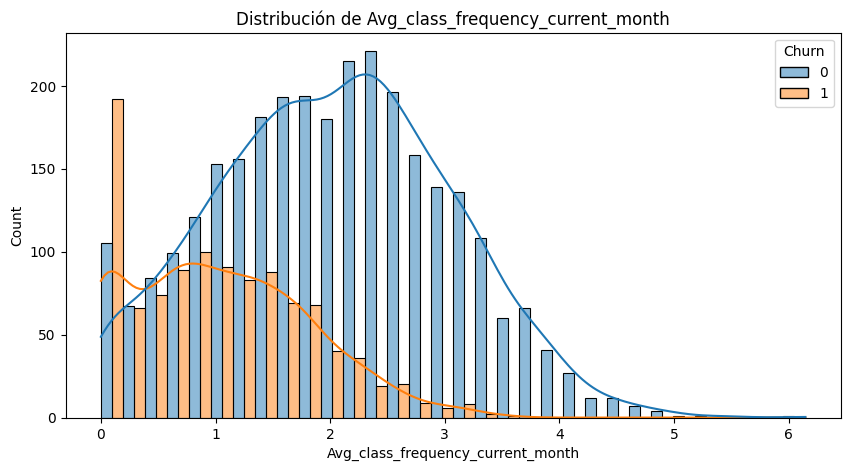

In [8]:
for column in gym_df.columns[:-1]:
    plt.figure(figsize=(10, 5)) 
    sns.histplot(data=gym_df, x=column, hue='Churn', multiple='dodge', kde=True)
    plt.title(f'Distribución de {column}') 
    plt.show()

Al tener graficado nuestros histogramas podemos ver mejor la distibucion divida por los usarios que cancelaron y las caractericas, comenzando a explicar los highlihgts.
* Genero, lo usuarios que cancelaron tienen la misma proporcion ya sea hombre o mujer no hubo una diferencia significativa
* Locación, aqui si hubo un porcentaje de cancelacion mayor en los usuarios cercanos pero igualmente en proporcion los usuarios que no son cercanos muestran más tendencia a cancelar 
* Los usuarios partners tienen una menor proporcion a los que no son a cancelar
* En el periodo del contrato se ve una clara tendencia a cancelar de los usuarios con el contrato de un mes 
* Los usuarios sin visitas en grupo tienden a cancelar más 
* En la edad vemos como se inclina hacia la izquierda los usuarios que cancelan y una distribucion uniforme a los usuarios que no
* Algo intersante en el lifetime es que los usuarios sin cancelar con menos del mes son muy pocos en comparacion a los que cancelan que son al rededor de 400 con menos del mes y 400 con un mes de lifetime
* En la frecuencia promedio de asistencia vemos como lo shabitos son importantes ya que los usuarios que cancelaron se encuentran con menos frecuencia por semana

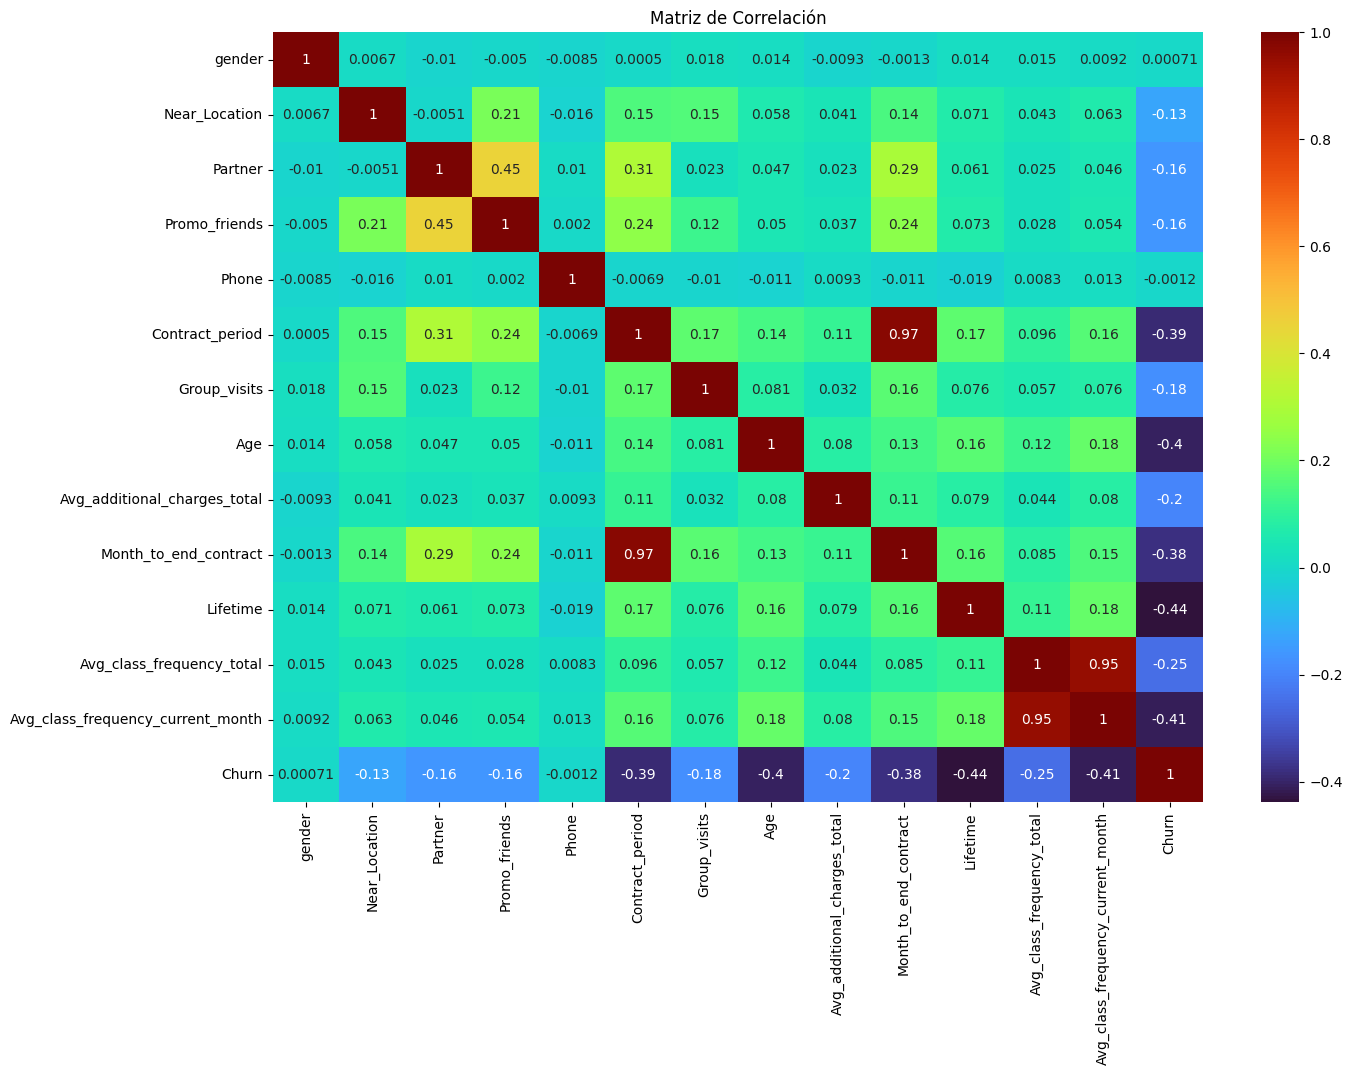

In [9]:
plt.figure(figsize=(15, 10)) 
correlation_matrix = gym_df.corr() 
sns.heatmap(correlation_matrix, annot=True, cmap='turbo')
plt.title('Matriz de Correlación')
plt.show()

En este mapa de correlacion tenemos visualizado comportamientos obvios como el de promedio de frecuencia del mes actual y el promedio de frecuencia del total ya que de uno se convierte al otro al siguiente mes, otra relacion muy fuerte es el de periodo de contrato y los meses para terminarlo ya que al pasar del tiempo uno aumenta y el otro disminuye en la misma medida, aqui lo que podemos descatacar el la varibale partner ya que esta relacionada medianamente con otras tres varibales que son en orden: promo friends, periodo de contrato y mes para terminar. 

Ahora bien con estas correlaciones nos podemos dar una idea de como afectan a nuesstra variable objetivo que es churn, la cancelacion algo interesante es que todas execepto el genero son negativas por lo que nos da a entender que mejorando nuestras variables selecionadas podemos hacer que se reduzca la cancelacion, y las variables con más peso son: el lifetime, el promedio de frecuencia actual, la edad y el periodo de contrato son las que muestran una significancia media.

# Paso 2
    Construimos un modelo de regresion logistica y de bosque aleatorio.

In [10]:
X = gym_df.drop('Churn', axis=1) 
y = gym_df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)

c:\Users\Pedro Montoya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

In [17]:
results = { 'Modelo': ['Regresión Logística', 'Bosque Aleatorio'], 'Exactitud': [accuracy_log_reg, accuracy_rf], 'Precisión': [precision_log_reg, precision_rf], 'Recall': [recall_log_reg, recall_rf] }
results_df = pd.DataFrame(results) 
print(results_df)

                Modelo  Exactitud  Precisión    Recall
0  Regresión Logística      0.915   0.880682  0.767327
1     Bosque Aleatorio      0.910   0.849462  0.782178


La exactitud de los modelos mide la proporción de predicciones correctas entre el total de predicciones. Ambos modelos tienen una alta exactitud, pero la regresión logística es ligeramente superior (91.5% vs. 91.0%).

La regresión logística muestra una mejor precisión (88.07% vs. 84.95%), indicando que este modelo es más efectivo para minimizar falsos positivos.

El bosque aleatorio tiene un mejor recall (78.22% vs. 76.73%), lo que significa que este modelo es más efectivo para identificar verdaderos casos de cancelación.

# Paso 3
    Creamos un clustering jerarquico aglomerativo y el dendrograma de visualizacion.

In [13]:
gym_clustering = gym_df.drop('Churn', axis=1)
sc = StandardScaler() 
gym_scaled = sc.fit_transform(gym_clustering)
linked = linkage(gym_scaled, method='ward')

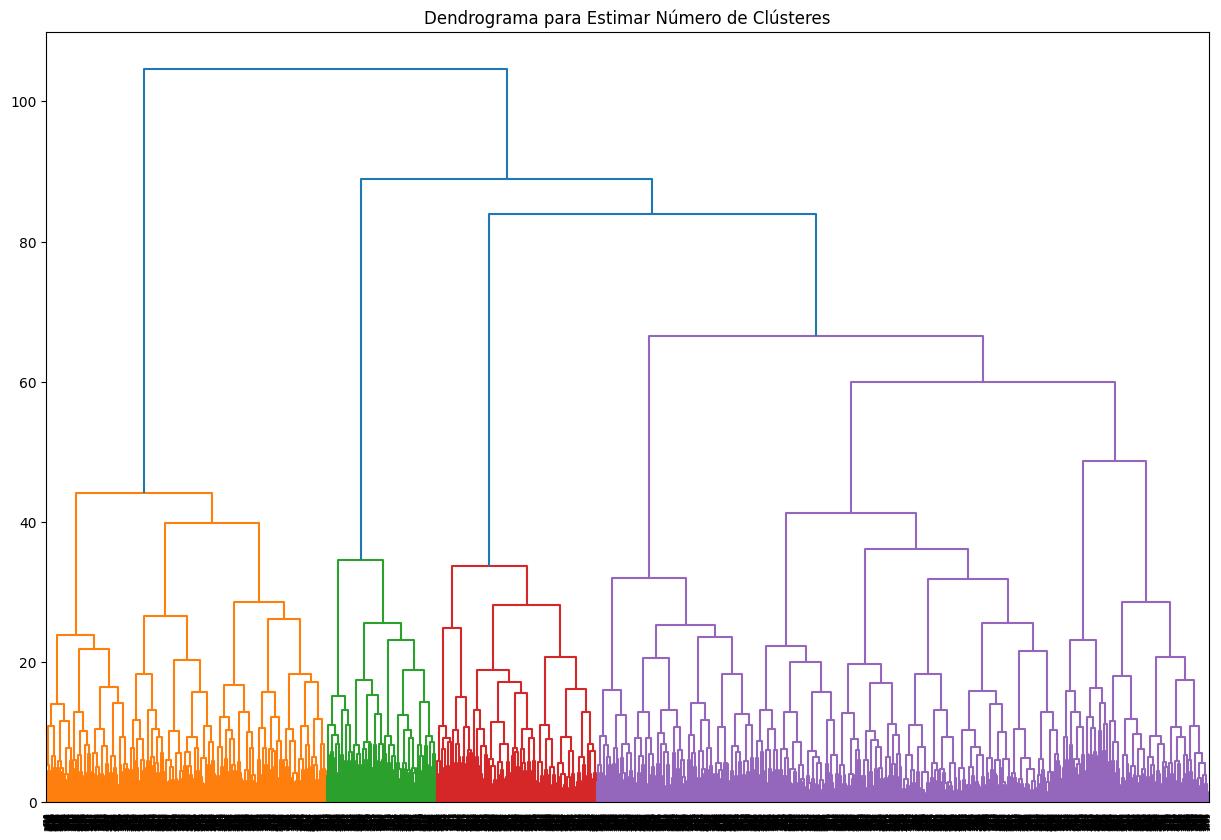

In [14]:
plt.figure(figsize=(15, 10)) 
dendrogram(linked, orientation='top')
plt.title('Dendrograma para Estimar Número de Clústeres') 
plt.show()

Para este clustering aglomerativo el número óptimo de clústeres sugerido es 4 que corresponde a los colores diferentes del gráfico.

In [15]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42) 
gym_df['cluster'] = kmeans.fit_predict(gym_scaled)
cluster_means = gym_df.groupby('cluster').mean() 
print(cluster_means) 

           gender  Near_Location   Partner  Promo_friends     Phone  \
cluster                                                               
0        0.488296       0.750975  0.369311       0.171001  0.908322   
1        0.544076       0.857820  0.322275       0.205687  0.911848   
2        0.505360       0.889740  0.529862       0.000000  0.880551   
3        0.511936       0.981432  0.919098       1.000000  0.901857   

         Contract_period  Group_visits        Age  \
cluster                                             
0               1.650195      0.282185  28.022757   
1               1.993365      0.422749  29.899526   
2              10.584992      0.517611  29.995406   
3               9.511936      0.571618  29.850133   

         Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
cluster                                                                  
0                          127.610632               1.587776  2.170351   
1                          158.2

Aqui tenemos una idea de los datos promedios de los clusters y como es su comportamiento podemos visualizar que en la locacion cluster 0 tiene un promedio de usuarios donde el 75% pertenece al vencindario en comparacion a el cluster 3 que tiene un 98% pero por consiguente tambien nos da que el 100% de los usuarios usa la promocion de amigos esto podemos intuir que en realidad en este clustering se basa en que todo el vencindario se encuentra como cliente y el 2% serian amigos invitados del vencindario, por otro lado el clustering 2 tiene un promedio de 0 en la promo amigos asi que seria como si en realidad los usuarios ninguno haya invitado a alguien aun que es el cluster con más meses de contrato por mucho no suena muy real que en promedio los usuarios tengan 10 meses de contrato ahora bien para analizar estos cluteres y nuestra variable objetivo tenemos estos promedios por cluter:

cluter/churn     
0        0.585176  
1        0.098578  
2        0.041348  
3        0.039788  

Como vemos el cluster 3 tiene una menor cancelacion seguido del 2 pero ya vimos que las variables de locacion del 3 y el periodo de contrato del 2 son variables en extremo determinantes de que haya tenido este resultado, ahora bien para para los clusters 0 y 1 no existe demasiada diferencia en los datos y si una gran diferencia en el porcentaje de cancelacion y podemos decir que el cluster 0 tiene un promedio más cercano a nuestros datos y el 1 es más optimista con más que nada en la frecuencia de asistencia total y actual entonces aqui podria estar nuestra variable determinante para buscar retener a nuestros clientes.

# Paso 4
    Trazamos distribuciones de características para los clústeres y profundizamos en la tasa de cancelación para cada clúster.

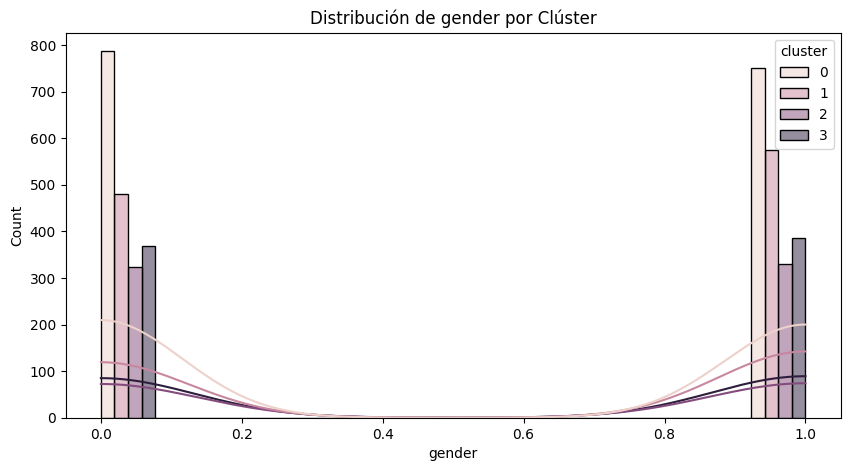

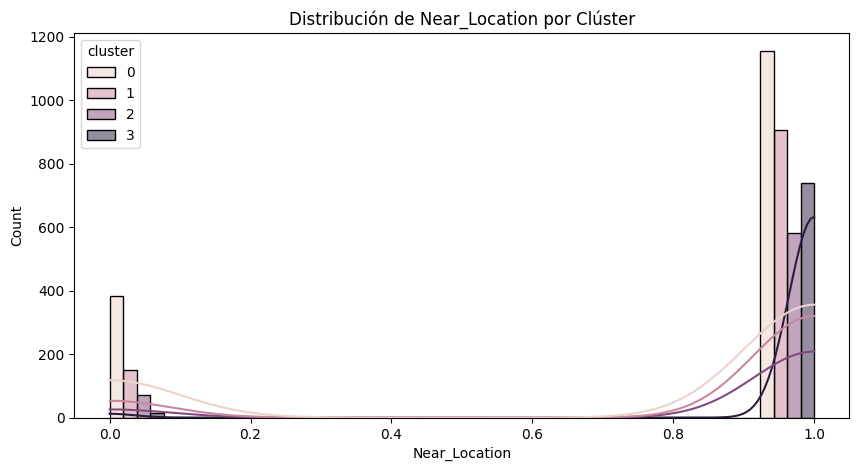

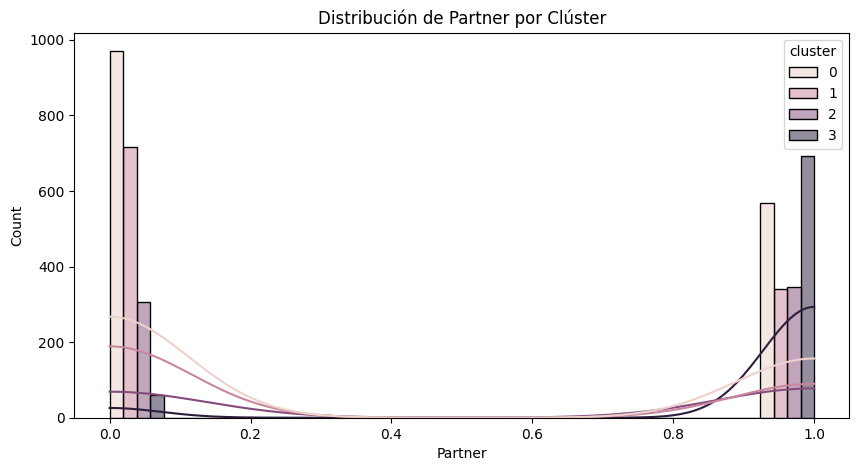

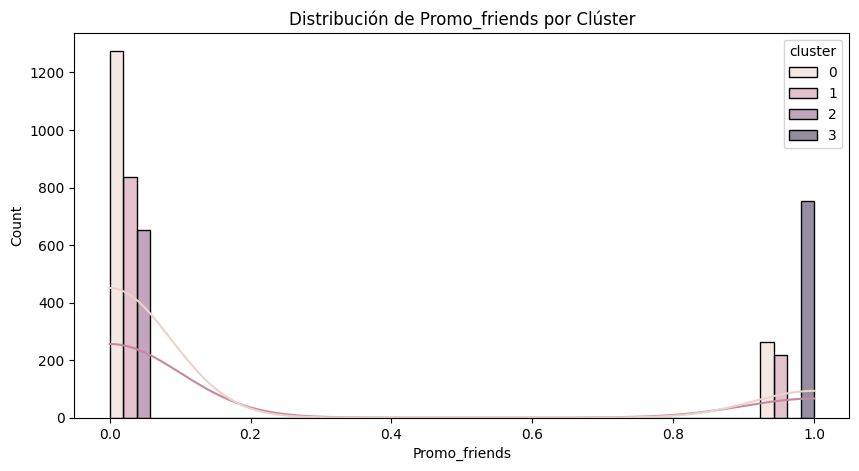

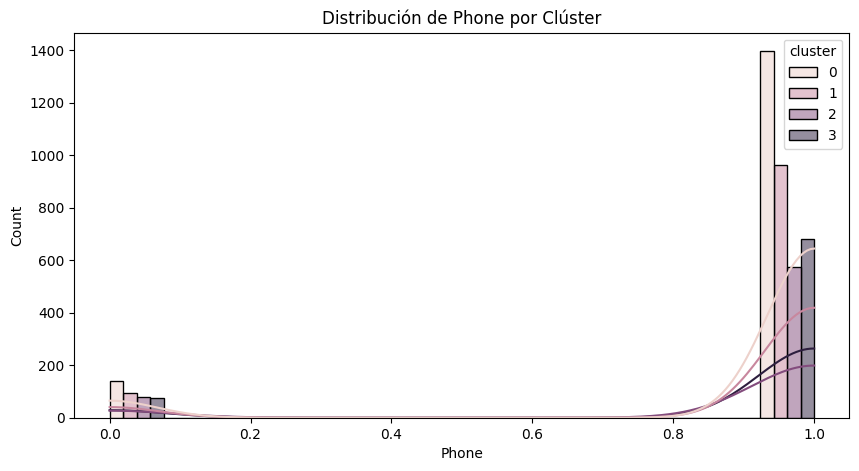

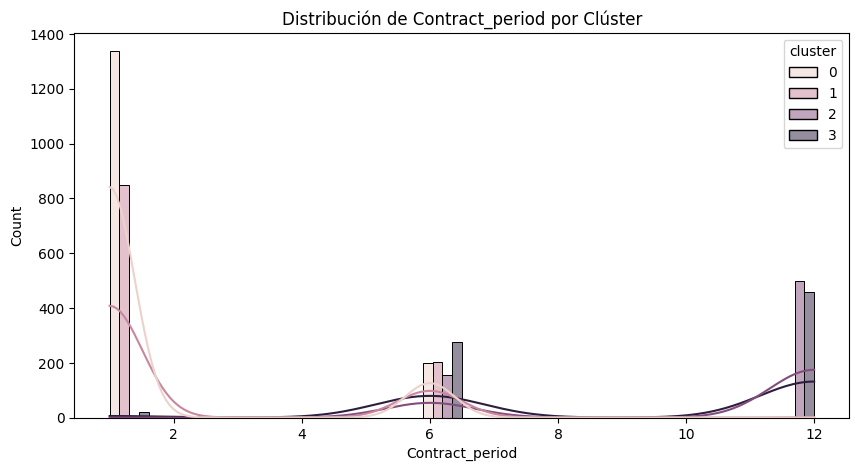

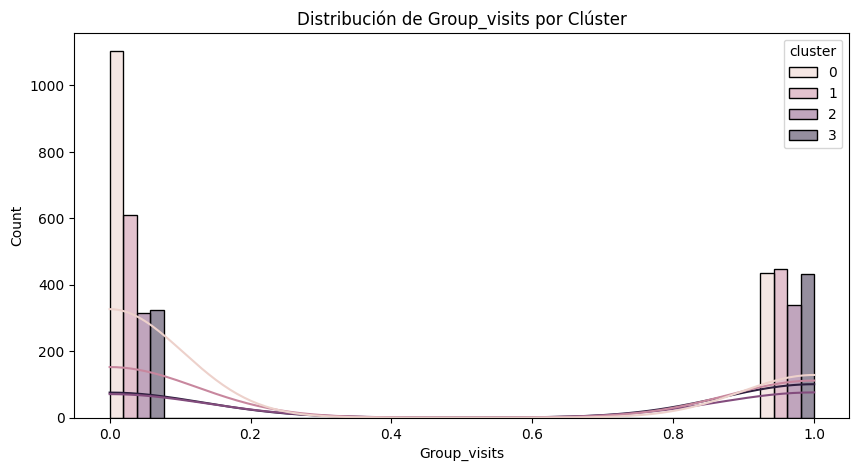

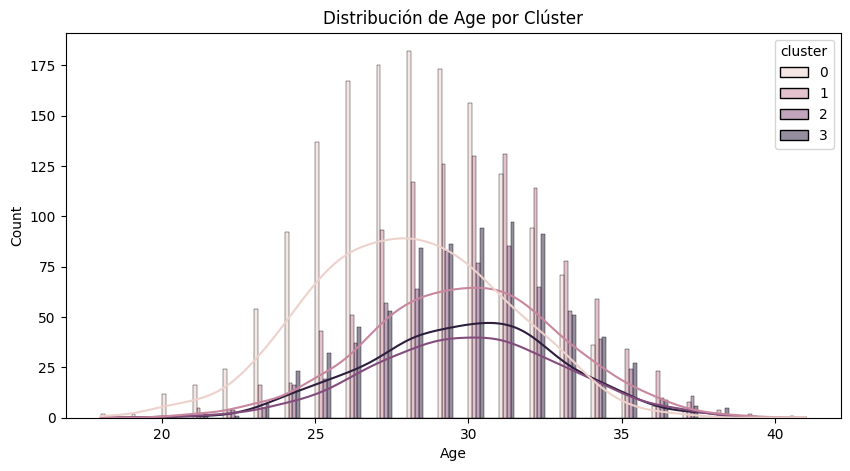

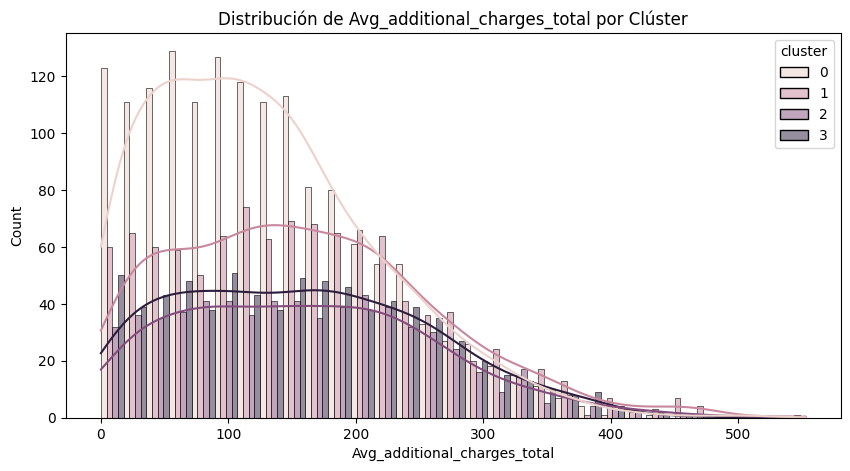

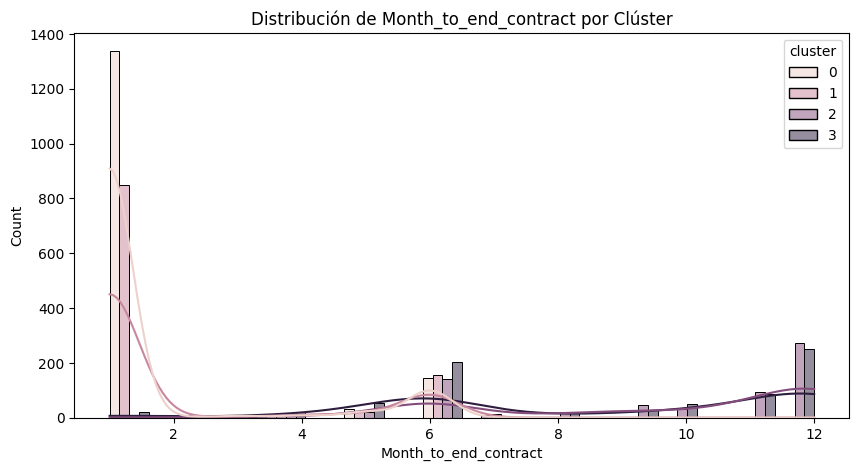

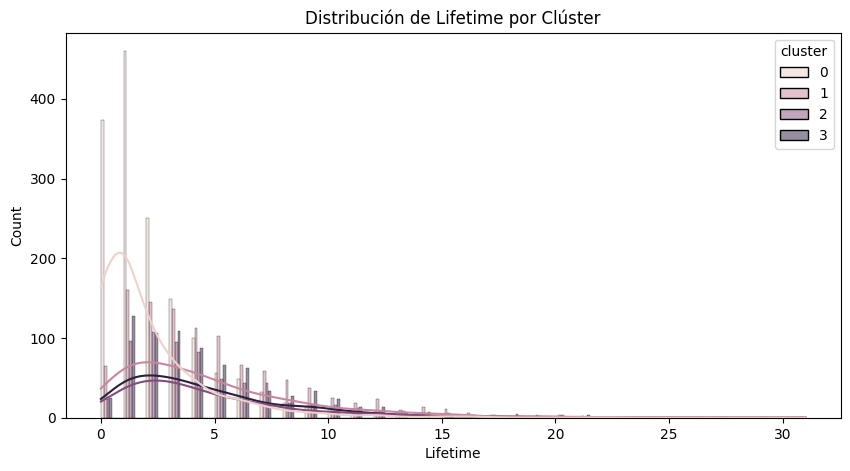

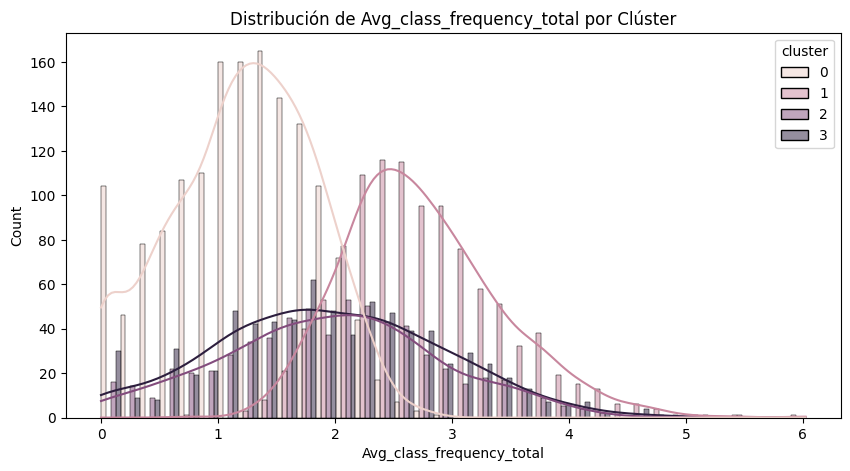

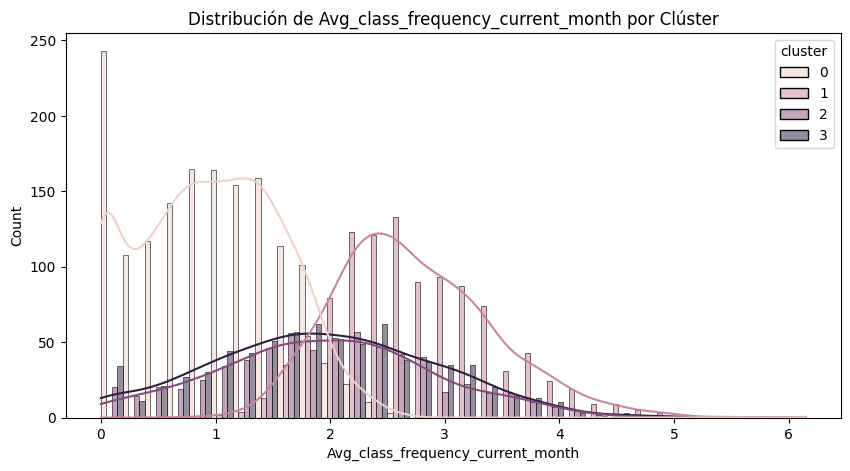

In [16]:
for column in gym_df.columns[:-2]:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=gym_df, x=column, hue='cluster', multiple='dodge', kde=True) 
    plt.title(f'Distribución de {column} por Clúster') 
    plt.show()

In [17]:
print(gym_df.groupby('cluster')['Churn'].mean() )

cluster
0    0.585176
1    0.098578
2    0.041348
3    0.039788
Name: Churn, dtype: float64


Una vez que hemos creado los clusters vizualizandolos podemos apreciar mejor la distribucion y centradonos en las graficas que son las que estan más relacionadas al churn que las discutimos con el mapa de correlacion (lifetime, el promedio de frecuencia actual, la edad y el periodo de contrato) e igual las que identificamos con los valores promedio.

* Para el lifetime vemos una alta concentracion del cluster 0 hacia la izquierda eso nos indica que los usuarios llegan a estar a lo mucho 4 meses.
* En el promedio de frecuencia del mes se nota claramente el comportamiento de los usuarios por su cluster y aqui podemos ver como el cluster 0 tiene la menor frecuencia de asistencia donde la mayoria esta en 0 asistencia y una mediana en el 1, mientras que el cluster 1 tiene una mediana alrededor de 2.5 clases, y los cluster 2 y 3 con una distribucion muy similar con la mediana a 2 asistencias, este fenomeno es trasladado a la grafica tanto de frecuencia del mes como total.
* Cuando vemos la grafica del periodo de contrato existe un gran contraste de los cluster con contratos de 1 mes que son el 0 y 1 a los clusters 2 y 3 con contratos de 12 meses y no solo eso si no que el conteo es mucho mayor en los dos primeros que quieres decir que hay más usuarios.
* Otro factor determinante es la edad donde aqui igual es facil de diferenciar como el cluster 0 tiene una tendencia a tener usuarios más jovenes que 30 años mientras que los otros clusters aun que a simple vista puedan estar alrededor de los 30 si hay pequeñas inclinaciones que el cluster 1 y 3 sus medias estan en 31 años el cluster 2 esta más inclinado a los 30.

# Conclusiones

    En primer lugar, el análisis descriptivo de los datos reveló que las características demográficas y de comportamiento de los usuarios son diversos, pero con algunas tendencias claras. Los datos muestran que los clientes son casi equitativos en cuanto al género, con una ligera mayoría masculina. La mayoría de los clientes (84%) vive cerca del gimnasio, lo que sugiere que la proximidad es un factor importante para la retención.

    En cuanto a la duración de las membresías, se observó que los contratos a corto plazo (especialmente los de un mes) están asociados con una mayor probabilidad de cancelación. Los clientes que cancelan tienden a tener contratos más cortos y un menor tiempo de vida como miembros (lifetime), con un promedio de 1.72 meses en comparación con 5.74 meses para aquellos que no cancelan. Este hallazgo destaca la necesidad de fomentar contratos de mayor duración para mejorar la retención.

    El análisis de la frecuencia de asistencia mostró que los hábitos de uso son cruciales para la retención. Los clientes que asisten con mayor frecuencia, tanto históricamente como en el mes actual, son menos propensos a cancelar. La participación en actividades grupales también se asocia positivamente con la retención, ya que solo el 26% de los clientes que cancelaron participa en estas actividades, frente al 46% de los que permanecen.

    Finalmente, el análisis de clústeres identificó cuatro grupos distintos de usuarios, cada uno con características y comportamientos únicos. El clúster con la menor tasa de cancelación (3.98%) se compone de usuarios con contratos más largos y mayor participación en actividades grupales, mientras que el clúster con la mayor tasa de cancelación (58.52%) incluye principalmente a usuarios jóvenes con contratos cortos y baja frecuencia de asistencia. Estos resultados indican que las estrategias de retención deben adaptarse a las características específicas de cada grupo.

# Recomendaciones
* Fomentar Contratos de Mayor Duración: Ofrecer incentivos y descuentos para contratos de 6 y 12 meses. Los contratos más largos se asocian con una menor tasa de cancelación y un mayor tiempo de vida como miembros.
   
* Promover Actividades Grupales: Implementar programas y campañas para aumentar la participación en actividades grupales. Los clientes que participan en estas actividades son menos propensos a cancelar.
    
* Personalización de Ofertas: Utilizar el análisis de clústeres para personalizar las ofertas y comunicaciones. Dirigirse al clúster con mayor tasa de cancelación con promociones específicas para extender contratos y aumentar la frecuencia de asistencia.
    
* Enfocar en Usuarios Jóvenes: Desarrollar estrategias específicas para atraer y retener a usuarios más jóvenes, quienes tienden a cancelar más. Esto podría incluir programas de fidelización, eventos sociales y descuentos en servicios adicionales.